## Natural Computing assignment 2: "Swarm Intelligence"

Link to code: https://github.com/PeaceDucko/radboud-msc-ds-natcomp/tree/main/assignment_2

| Exercise | DONE? |
| :------: | :---- |
| 1 | Y |
| 2 | Y |
| 3 | Y |
| 4 | Y |
| 5 | Y |

## 1. (PSO) \[2 points\]

Suppose you want to use a PSO system to maximize the function

$$f(x) = \sum_{i=1}^{2}(-x(i)) sin(\sqrt{(\mid x(i)\mid)}) $$ ,

where $-500 \leq x(i) \leq 500$. A graph of this function is shown in the slides of the
lecture (the function’s global maximum is at $f(x) = 837.9658$ for $x(i) = -420.9687,
i = 1, 2$).

Consider an illustrative example of a PSO system for composed of three particles.
The space of solutions is a two dimensional real valued space: $-500 \leq x(i) \leq 500$.

Consider the update rule for each particle i:

$$v_i=\omega v_i +\alpha_1 r_1(x_i^*-x_i)+\alpha_1 r_2(x^*-x_i)$$,

where $x_i^*$ denotes the personal best and $x^*$ the social (global) best. To facilitate
calculation, for this exercise we will ignore the fact that $r_1$ and $r_2$ are random numbers
and fix them to $0.5$ and $\alpha_1 = \alpha_2 = 1$. Suppose the current state of the swarm is as
follows.

- Position of particles: $x_1 = (-400, -400)$; $x_2 = (-410, -410)$; $x_3 = (-415, -415)$;
- Individual best positions: $x_1^* = x_1$ ; $x_2^* = x_2$ ; $x_2^* = x_3$ ;
- Social best position: $x^* = x_3$ ;
- Velocities: $v_1 = v_2 = v_3 = (-50, -50)$.


- (a) Compute the fitness of each particle.
- (b) What would be the next position and fitness of each particle after one iteration
of the PSO algorithm, when using $\omega = 2$, $\omega = 0.5$, and $\omega = 0.1$? (In case a
component of a new position falls outside the range $-500 \leq x(i) \leq 500$, it is
mapped to its closest value in the range. For instance, if the computation of
new position gives (550, 500), it is set to (500, 500).)
- (c) Explain what is the effect of the parameter $\omega$.
- (d) Give an advantage and a disadvantage of a high value of $\omega$.


A)

Please refer to the code on our github page: https://github.com/PeaceDucko/radboud-msc-ds-natcomp/tree/main/assignment_2

B)

$\omega$ = 2

$x_1$ fitness = -361.1783170627835, $x_1$ position = $[-500, -500]$

$x_2$ fitness  = -361.1783170627835, $x_2$ position = $[-500, -500]$

$x_3$ fitness = -361.1783170627835, $x_3$ position = $[-500, -500]$

$\omega$ = 0.5

$x_1$ fitness = 804.4822309250023, $x_1$ position = $[-432.5, -432.5]$

$x_2$ fitness = 769.4947716725984, $x_2$ position = $[-437.5, -437.5]$

$x_3$ fitness = 747.5297044219257, $x_3$ position = $[-440.0, -440.0]$

$\omega$ = 0.1

$x_1$ fitness = 819.9905472762648, $x_1$ position = $[-412.5, -412.5]$

$x_2$ fitness = 834.9351365389027, $x_2$ position = $[-417.5, -417.5]$

$x_3$ fitness = 837.7290352197082, $x_3$ position = $[-420.0, -420.0]$

C)
 
 $\omega$ < 1: particles may decelerate until their velocities reach zero. 
 
 $\omega$ > 1: : velocities increase over time causing divergent behavior, so that particles fail to change direction in order to move back towards promising areas.

 In this example $\omega$ is < 1 which means that their velocity will steadily decrease overtime. 

D)

A big $\omega$ will increase the velocity and therefor be faster near the desired position, it may however overshoot it. When overshooting particles could fail to change direction in order to move back towards desired position.


In [ ]:
import random
import numpy as np

def f(x):
    totals = 0
    for i in range(0,len(x)):
        totals += (-x[i])*np.sin(np.sqrt(np.abs(x[i])))

    return totals

class Particle():
    def __init__(self):
        self.position=[]      
        self.velocity=[]     
        self.local_best=[]   
    
    def update_velocity(self, omega, a1, a2, r1, r2, global_best):
        for i in range(0,len(self.velocity)):
            vel1 = a1*r1*(self.local_best[i]-self.position[i])
            vel2 = a1*r2*(global_best[i]-self.position[i])
            self.velocity[i] = omega*self.velocity[i]+vel1+vel2

    def update_position(self, x_bounds):
        for i in range(0,len(self.position)):
            self.position[i] = self.position[i]+self.velocity[i]

            if self.position[i]>x_bounds[i][1]:
                self.position[i]=x_bounds[i][1]

            if self.position[i] < x_bounds[i][0]:
                self.position[i]=x_bounds[i][0]

    def update_local_best(self):
        if f(self.position) < f(self.local_best):
            self.local_best = self.position

class PSO():
    def __init__(self,x_bounds,iters, a1, a2, r1, r2, omega):
        x1 = Particle()
        x1.position = [-400,-400]
        x1.velocity = [-50,-50]
        x1.local_best = x1.position

        x2 = Particle()
        x2.position = [-410,-410]
        x2.velocity = [-50,-50]
        x2.local_best = x2.position

        x3 = Particle()
        x3.position = [-415,-415]
        x3.velocity = [-50,-50]
        x3.local_best = x3.position

        swarm=[x1, x2, x3]

        global_best = x3.local_best          

        i=0
        while i < iters:
            for j in range(0,len(swarm)):
                swarm[j].update_velocity(omega, a1, a2, r1, r2, global_best)
                swarm[j].update_position(x_bounds)

            # cycle through swarm and update velocities and position
            for j in range(0,len(swarm)):
                swarm[j].update_local_best()
                
                if f(swarm[j].position) < f(global_best):
                    global_best = swarm[j].position

            i+=1

        # print final results
        print("Global best position: "+ str(global_best))
        print("Global best fitness: "+ str(f(global_best)))

        print("----")
        print("Fitness particle x1: "+str(f(x1.position)))
        print("Fitness particle x2: "+str(f(x2.position)))
        print("Fitness particle x3: "+str(f(x3.position)))
        print("----")
        print("Position particle x1: "+str(x1.position))
        print("Position particle x2: "+str(x2.position))
        print("Position particle x3: "+str(x3.position))

a1 = a2 = 1
r1 = r2 = 0.5
omega = 0.1

x_bounds = [(-500,500),(-500,500),(-500,500)]
iters = 1

PSO(x_bounds,iters, a1, a2, r1, r2, omega)

Global best position: [-412.5, -412.5]
Global best fitness: 819.9905472762648
----
Fitness particle x1: 819.9905472762648
Fitness particle x2: 834.9351365389027
Fitness particle x3: 837.7290352197082
----
Position particle x1: [-412.5, -412.5]
Position particle x2: [-417.5, -417.5]
Position particle x3: [-420.0, -420.0]


## 2. (PSO) \[2 points\]
Consider a particle “swarm” consisting of a single member. How
would it perform in a trivial task such as the minimization of $f(x)=x^2$ when $\omega$ < $1$,
assuming the particle starts with the velocity pointing away from the optimum (e.g.
in a state with velocity $v = 10$; position $x = 20$)?



Because there is only a single member in this swarm $$x_i^*$$ and $$x^*$$ are equal to $$x_i$$.

Because of this $$\alpha_1 r_1(x_i^*-x_i)+\alpha_1 r_2(x^*-x_i)$$ will alway be equal to zero because $$(x_i^*-x_i)$$ and $$(x^*-x_i)$$ are equal to zero and multiplying $$\alpha_i r_i$$ by zero is still equal to zero.

So in this swarm the only thing that has influence on the velocity and position is $$\omega *  v_i$$

but because $\omega$ < 1: particles may decelerate until their velocities reach zero.

This inclines that $\omega$ will not go below zero and thus the velocity will never be negative.

So at the end the single member of the swarm will drift further away from the minimization until it stops and uses it's local minimization as it's final solution.


## 3. (PSO) \[2 points\]
Implement the PSO algorithm for clustering described in “Van
der Merwe, D. W., and Andries Petrus Engelbrecht. ”Data clustering using particle
swarm optimization.” Evolutionary Computation, 2003. CEC’03. The 2003 Congress
on. Vol. 1. IEEE, 2003.” (see also swarm intelligence slides).

Implement the k-means
clustering.

Apply and compare the performance of the two algorithms in terms of quantization
error on Artificial dataset 1 and on the Iris dataset (the latter available at UCI
ML repository, see https://archive.ics.uci.edu/ml/datasets/iris). _In both
algorithms, use the true number of clusters as value of the parameter for setting the
number of clusters._


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pyswarms as ps
from sklearn.cluster import KMeans

(400, 2)


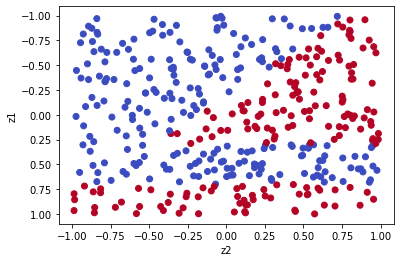

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
(149, 5)


In [266]:
# Artificial problem 1
data_art_x = np.random.uniform(-1,1, (400,2))
data_art_y = [(z1 >= 0.7) or (z1 <= 0.3 and (z2 >= -0.2 - z1)) for z1,z2 in data_art_x]
print(data_art_x.shape)

plt.figure()
plt.scatter(data_art_x[:, 1], data_art_x[:, 0], c=data_art_y, cmap="coolwarm")
plt.xlabel("z2")
plt.ylabel("z1")
plt.gca().invert_yaxis()
plt.show()

# Iris dataset
data_ir = pd.read_csv("iris.data").to_numpy()

data_ir_x = data_ir[:,:4].astype(float)
data_ir_y = data_ir[:,4]
data_ir_classes = np.unique(data_ir_y)

print(data_ir_classes)

print(data_ir.shape)
# print(data_ir)

In [325]:
t_max = 150


In [278]:
# zp = p-th data vector
# mj = cluster j centroid vector
# Cj = cluster of data vectors that form cluster j

def f(x, distances, particle_centroids):
    distances = np.array(distances)

    fitness = 0

    C1 = 0
    C2 = 0

    for i, dist in zip(x, distances):
        if np.argmin(dist) == 0: C1 += 1
        else: C2 += 1

    Cij = [C1,C2]

    for j in range(0,2):
        for i, dist in zip(x, distances):
            fitness += (dist[j]/(np.abs(Cij[j])+1))/2
        
    #print("Cij",Cij)

    #print("----")
    return fitness

In [275]:
PSO_Clustering(10, 2, 1.49, 1.49, 0.72, 2, data_art_x)

Current iter: 1
Best_qe: 1.6222951573329336 <class 'numpy.float64'>


(array([[ 0.34559631,  0.16580801],
        [-0.18847945, -0.29084309]]),
 [1.6222951573329336])

In [318]:
def PSO_Clustering(particle_counts, centroid_counts, c1, c2, w, iter_max, data_x, k_particle=None):
    # Initialise the particles
    dims = data_x.shape[1]
    dim_mins = np.amin(data_x, axis=0)
    dim_maxs = np.amax(data_x, axis=0)

    qe_history = []
    
    # Random initialisation of global best, will be overtaken
    global_best = np.zeros((centroid_counts, dims))
    for c, centroid in enumerate(global_best):
        for d in range(dims):
            global_best[c, d] = np.random.uniform(dim_mins[d], dim_maxs[d])
    

    particles = np.zeros((particle_counts, centroid_counts, dims))
    particle_velocities = np.zeros((particle_counts, centroid_counts, dims))
    particle_bests = np.zeros((particle_counts, centroid_counts, dims))
    for i, particle in enumerate(particles):
        for j, centroid in enumerate(particle):
            for k, dim in enumerate(centroid):
                particles[i,j,k] = np.random.uniform(dim_mins[k], dim_maxs[k])
                particle_bests[i,j,k] = particles[i,j,k]
    
    # Use the argument for the hybrid algorithm if it is set
    if k_particle is not None:
        #print((centroid_counts, dims))
        #print(k_particle.shape)
        assert k_particle.shape == (centroid_counts, dims)
        particles[0] = k_particle
        particle_bests[0] = k_particle

    # Perform the algorithm
    best_qe = None
    for cur_iter in range(1, iter_max):
        total_qe = 0
        for particle in particles:
            list_of_distances = []
            for zp in data_x:
                '''
                print("Single data point")
                print(particle)
                print("zp")
                print(zp)
                print()
                print(particle-zp)
                print("norm")
                '''
                distances = np.linalg.norm(particle-zp, axis=1)
                list_of_distances.append(distances)
            quantization_error = f(data_x, list_of_distances, particle) # Alle datavectoren, lijst van, per datavector de lijst van distances tot de centroids, lijst van centroids (van de huidige particle)
            #print("Returned quantization error",quantization_error)
            
            total_qe += quantization_error
            if best_qe is None or best_qe >= quantization_error:
                best_qe = quantization_error
                global_best = particle
        
        #print(f"Best_qe: {best_qe} {type(best_qe)}")
        qe_history.append(best_qe)

        # Update the cluster centroids
        for i, particle in enumerate(particles):
            for j, centroid in enumerate(particle):
                component1 = c1*np.random.uniform(0,1)*(particle_bests[i,j] - particles[i,j])
                component2 = c2*np.random.uniform(0,1)*(global_best[j] - particles[i,j])
                #print("Comp1",component1.shape) # (2,)
                #print("Comp2",component2.shape) # (2,2)
                #print("Shapevol",particle_velocities[i,j].shape)
                particle_velocities[i,j] = w*particle_velocities[i,j] + component1 + component2
    
                particles[i,j] = particles[i,j] + particle_velocities[i,j]
    

    return global_best, qe_history
            

In [252]:
PSO_Clustering(10, 2, 1.49, 1.49, 0.72, 5, data_art_x)

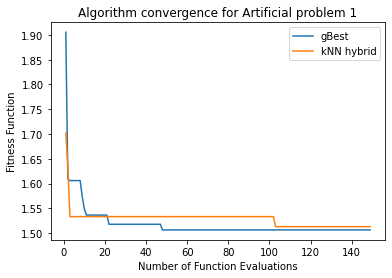

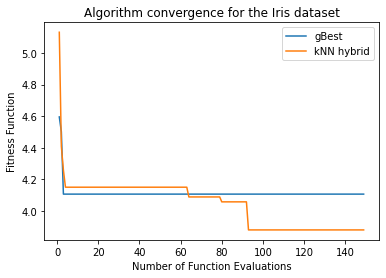

In [326]:
global_best, qe_history = PSO_Clustering(10, 2, 1.49, 1.49, 0.72, t_max, data_art_x) #[20/t for t in range(1,t_max)] # Hier het resultaat van het aanroepen van het algoritme op de data_art dataset
km = KMeans(n_clusters = 2)
km.fit(data_art_x)
global_best_kNN, qe_history_kNN = PSO_Clustering(10, 2, 1.49, 1.49, 0.72, t_max, data_art_x, k_particle=km.cluster_centers_)

plt.figure()
plt.title("Algorithm convergence for Artificial problem 1")
plt.plot(list(range(1,t_max)), qe_history, label="gBest")
plt.plot(list(range(1,t_max)), qe_history_kNN, label="kNN hybrid")
plt.xlabel("Number of Function Evaluations")
plt.ylabel("Fitness Function")
plt.legend()
plt.show()

global_best, qe_history = PSO_Clustering(10, 3, 1.49, 1.49, 0.72, t_max, data_ir_x) # Hier het resultaat van het aanroepen van het algoritme op de data_ir dataset
km = KMeans(n_clusters = 3)
km.fit(data_ir_x)
global_best_kNN, qe_history_kNN = PSO_Clustering(10, 3, 1.49, 1.49, 0.72, t_max, data_ir_x, k_particle=km.cluster_centers_)

plt.figure()
plt.title("Algorithm convergence for the Iris dataset")
plt.plot(list(range(1,t_max)), qe_history, label="gBest")
plt.plot(list(range(1,t_max)), qe_history_kNN, label="kNN hybrid")
plt.xlabel("Number of Function Evaluations")
plt.ylabel("Fitness Function")
plt.legend()
plt.show()

We compare our results with those of van der Merwe and Engelbrecht. The authors found likewise performance from both PSO and the hybrid PSO + kNN algorithm on the artificial problem 1 data, and better hybrid performance on the Iris dataset. Our results complement their claims, showing that both algorithms show somewhat similar performance on the artificial dataset 1, with the hybrid algorithm performing better on the iris dataset.

We do find a difference in values from our fitness function (quantization error) compared to those of van der Merwe and Engelbrecht. We think these differences are due to our approach using the sum of the quantization error, without first normalizing the data. 

## 4. (ACO) \[2 points\]
Read the paper: Blum, Christian, and Marco Dorigo. ”Search bias
in ant colony optimization: On the role of competition-balanced systems.” IEEE
Transactions on Evolutionary Computation 9.2 (2005): 159-174.

Figure 1 shows a
(toy) problem instance for the 2-cardinality tree problem. The 2-cardinality tree
problem amounts to finding a subtree T of a given undirected graph G with exactly
2 edges and the minimum possible weight.

- (a) Is ACO for this problem a Competition-Balanced System (CBS)? Justify your
answer. (A definition of CBS also given in the slides.)
- (b) If a combination of an ACO algorithm and a problem instance is not a CBS, is
the induced bias always harmful? Justify your answer.

- (a) Quotes from literature "3 In this context, we call the competition between the solution components a fair competition if
the combination of an ACO algorithm and a problem instance is a CBS." & "The AS algorithm applied to any ATSP
problem instance is a CBS. This is because each link (i.e., each
solution components) is in the same number of solutions (i.e.,
Hamiltonian cycles in the ATSP graph), namely, solutions. Therefore, at each construction step the competing solution components are in the same number of feasible solutions." These quotes tell us why the ASTP is a CBS in the literature. in this toy example we don't have a Hamiltonian path and because of this the FODS can't locally optimize. and because that can't happen this instance has a SODS.

- (b) Quote from literature "we show that the harmful bias is due to the fact that, in general,
the combination of the above explained ACO algorithm with JSS instances is not a CBS" This indicates that bias is harmfull when a instance is not CBS

## 5. (ACO) \[2 point\]
The figure below shows an example of an instance of a source-destination problem from the ACO book by Dorigo and Stuetzle. The goal is to
reach the destination node from the source one using a shortest path through the
given graph. What results do you expect for an ant colony algorithm that does not
use tabu lists (except for inhibition of immediate return to the previous node)?


Well, it depends on the specific update rule and alpha/beta-parameters, but in general, the lack of a tabu list would be quite detrimental.
Because it means that the ants can choose already visited nodes for their paths, this may end up with long cycles in paths that are found in the ConstructSolutions step.
It also cannot distinguish between 1. edges that were helpful in getting to the current (close to destination) node through another path than the current one and 2. edges that will bring the agent closer to the destination.
Edges that occur more often in solutions (which would be weighed in the direction of edges that occur in cycles) would receive a disproportionate amount of pheromones compared to the edges that exit these cycles. 
While the destination will still be found because the choice of next node is based on probability, this may take a long time and it will not converge in a reasonable amount of time.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=89440646-9834-412c-9b8b-9adf276da239' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>